In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

# Load Data

In [ ]:
data = pd.read_csv("/content/Automobile_data.csv", na_values=['?', ' ?', '? '])
data=data.replace(['?'], np.nan)

In [ ]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# Data Visualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
data.shape


(205, 26)

In [ ]:
# print all atributes
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

Observations:

1) Total 205 data points and 26 attributes.

2) Attributes has different data types.

3) Here shows NaN values.

In [ ]:
# sns.pairplot(data[['engine-size','city-mpg','compression-ratio','width']])


In [ ]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


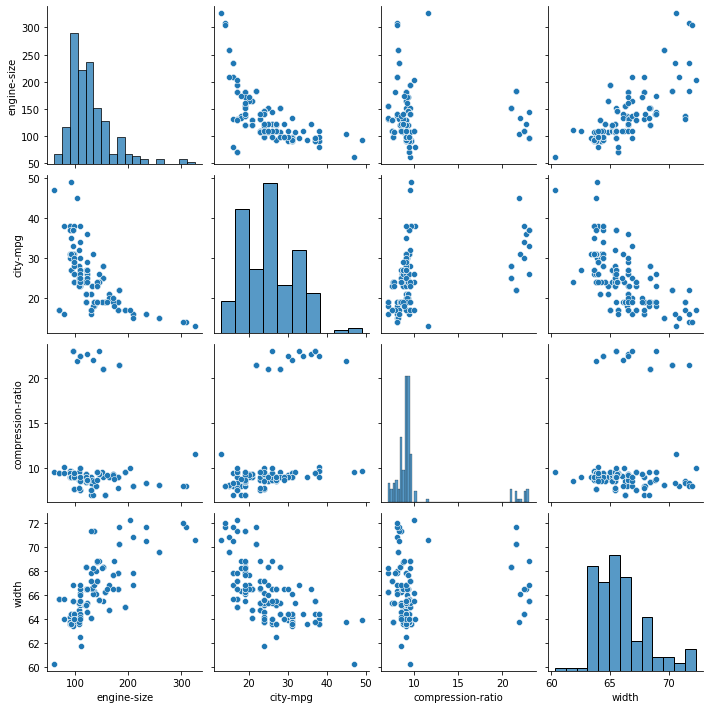

In [ ]:
sns.pairplot(data[['engine-size','city-mpg','compression-ratio','width']])

We can conclude more observations comparing each variables

1.For various width values the compression ratio and the city-mpgremains nearly constant with some higher compression ratios and linearly decreases with city mpg

2.Compression ratio are mostly 10 and 20 and 10 being the most commonly used.

3.City mpg increases with decreases in size.

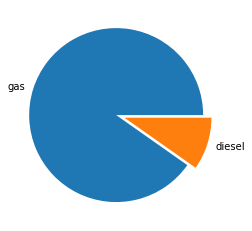

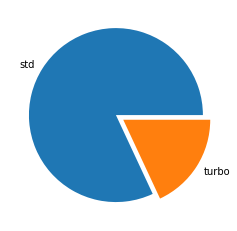

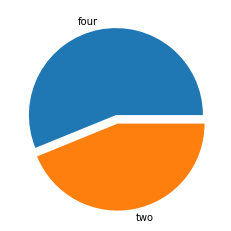

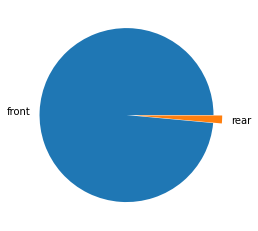

In [ ]:
def pie_chart(cols):
    for col in cols:
        fig, ax = plt.subplots(figsize=(6,4))
        plt.pie(x=data[col].value_counts(), labels=list(data[col].value_counts().index), explode = (0, 0.1))
        plt.show()
pie_chart(['fuel-type', 'aspiration', 'num-of-doors', 'engine-location'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


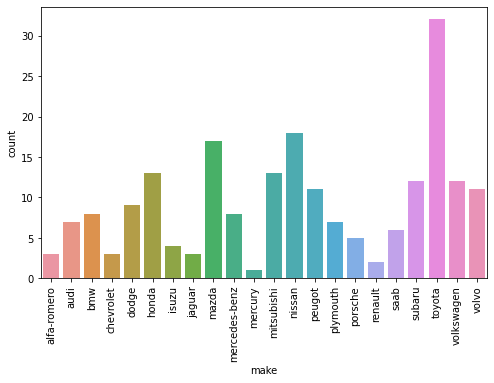

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data.make)
plt.xticks(rotation=90)
plt.show()

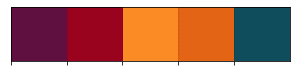

In [ ]:
COLOR = 'black'
mpl.rcParams.update({'text.color' : COLOR,
                     'axes.labelcolor' : COLOR,
                     'xtick.color' : COLOR,
                     'ytick.color' : COLOR,
                     'axes.labelsize' : 18,
                     'axes.titlesize' : 18,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'axes.grid' : True,
                     'grid.color' : 'k',
                     'grid.alpha' : 0.4,
                     'grid.linestyle' : ':',
                     'grid.linewidth' : 0.5})

palette = ["#5f0f40","#9a031e","#fb8b24","#e36414","#0f4c5c"]
sns.palplot(sns.color_palette(palette))
plt.show()

In [ ]:
def feature_analysis(df, col):
    df[col].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10))


    return df[col].value_counts(dropna = False).to_frame(name=f"{col} #").style.bar(subset=f"{col} #", color = palette[4])

,make #
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugot,11
volvo,11
dodge,9


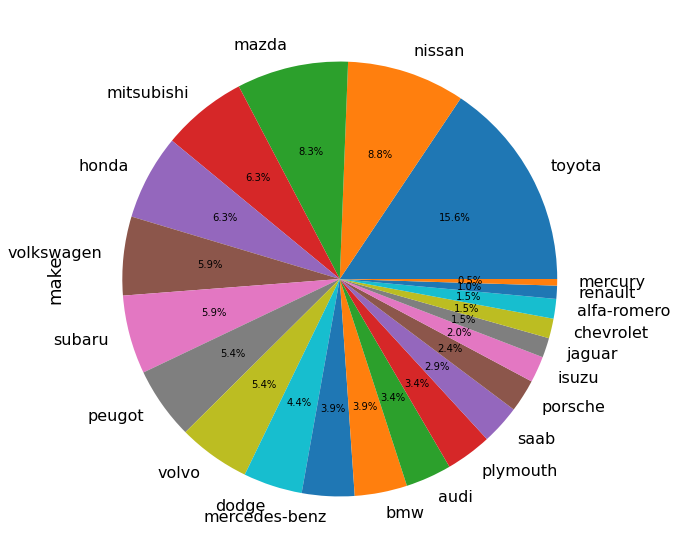

In [ ]:
feature_analysis(data, 'make')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


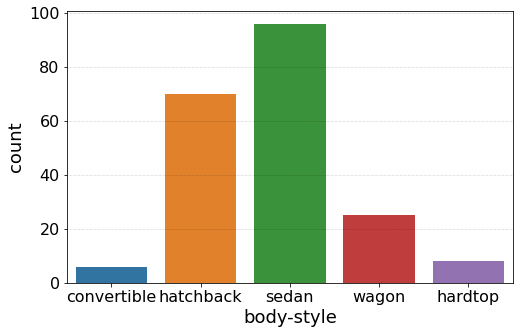

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data['body-style'])
plt.show()

# Data Preprocessing

In [ ]:
# null values
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We can see that there are null values present in nomalized- losses, num-of-doors, bore, stroke, horsepower, peak-rpm, price

In [ ]:
cols = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm']
for col in cols:
     data[col]=pd.to_numeric(data[col])
     data[col].fillna(data[col].mean(), inplace=True)

In [ ]:
# Dropping every row with NaN in "price" attribute
data.dropna(subset=["price"], axis=0, inplace=True)

# Reset index, because we droped four rows
data.reset_index(drop=True, inplace=True)

In [ ]:
data['num-of-doors']=data['num-of-doors'].fillna(data['num-of-doors'].value_counts().sort_values(ascending=False).index[0])

In [ ]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


All the null values present in the above mentioned columns were filled with the mean values of that particular columns
In the price column, every row with NaN in "price" attribute is dropped.


In [ ]:
c=data.corr()


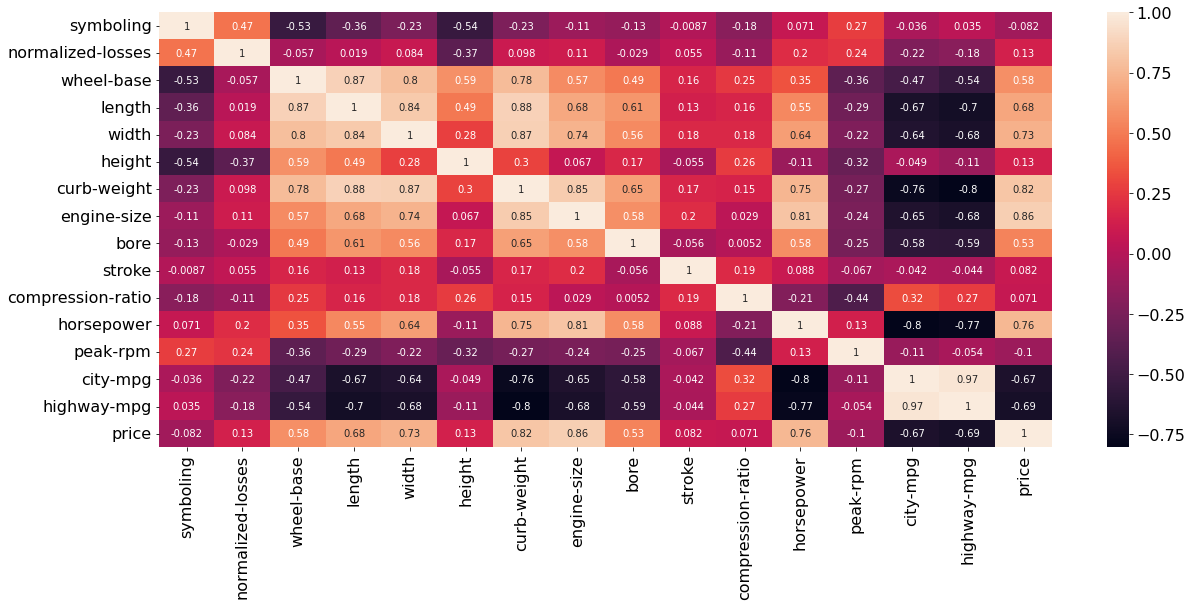

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(c,annot=True)

 **Findings**:

There are some good inferences we can take it from the correlation heat map.

1. Price is more correlated with engine size and curb weight of the car

2. Curb weight is mostly correlated with engine size, length, width and wheel based which is expected as these adds up the weight of the car

3. Wheel base is highly correlated with length and width of the car

4. Symboling and normalized car are correlated than the other fields

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


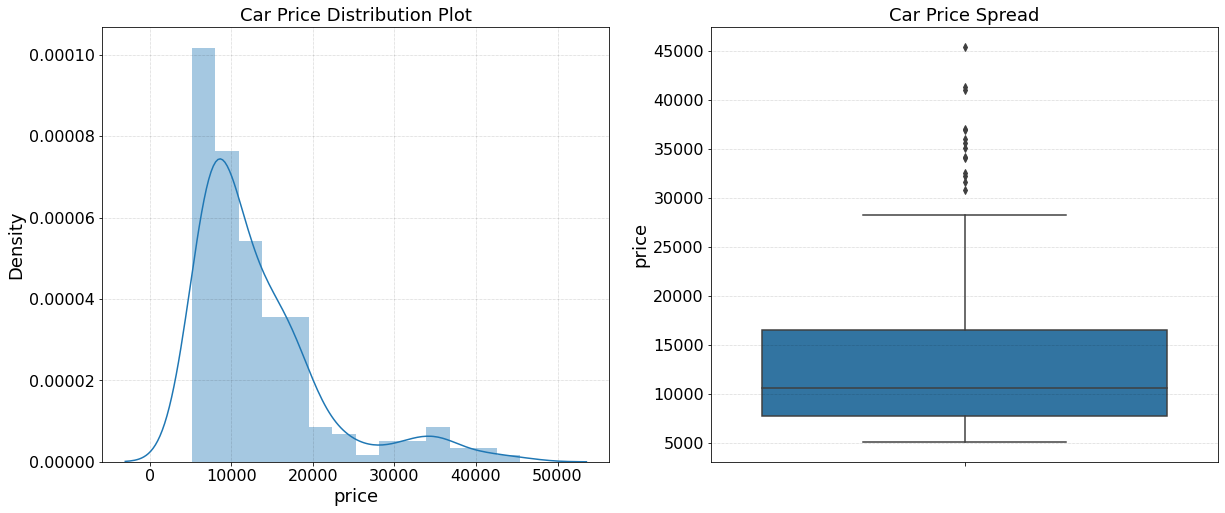

In [ ]:

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

In [ ]:
print(data.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13207.129353
std       7868.768212
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
85%      18407.400000
90%      22289.200000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


**Inference :**


1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).

2. There is a significant difference between the mean and the median of the price distribution.

3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

In [ ]:
# taking numerical features for plotting scatter plot
num_features = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']

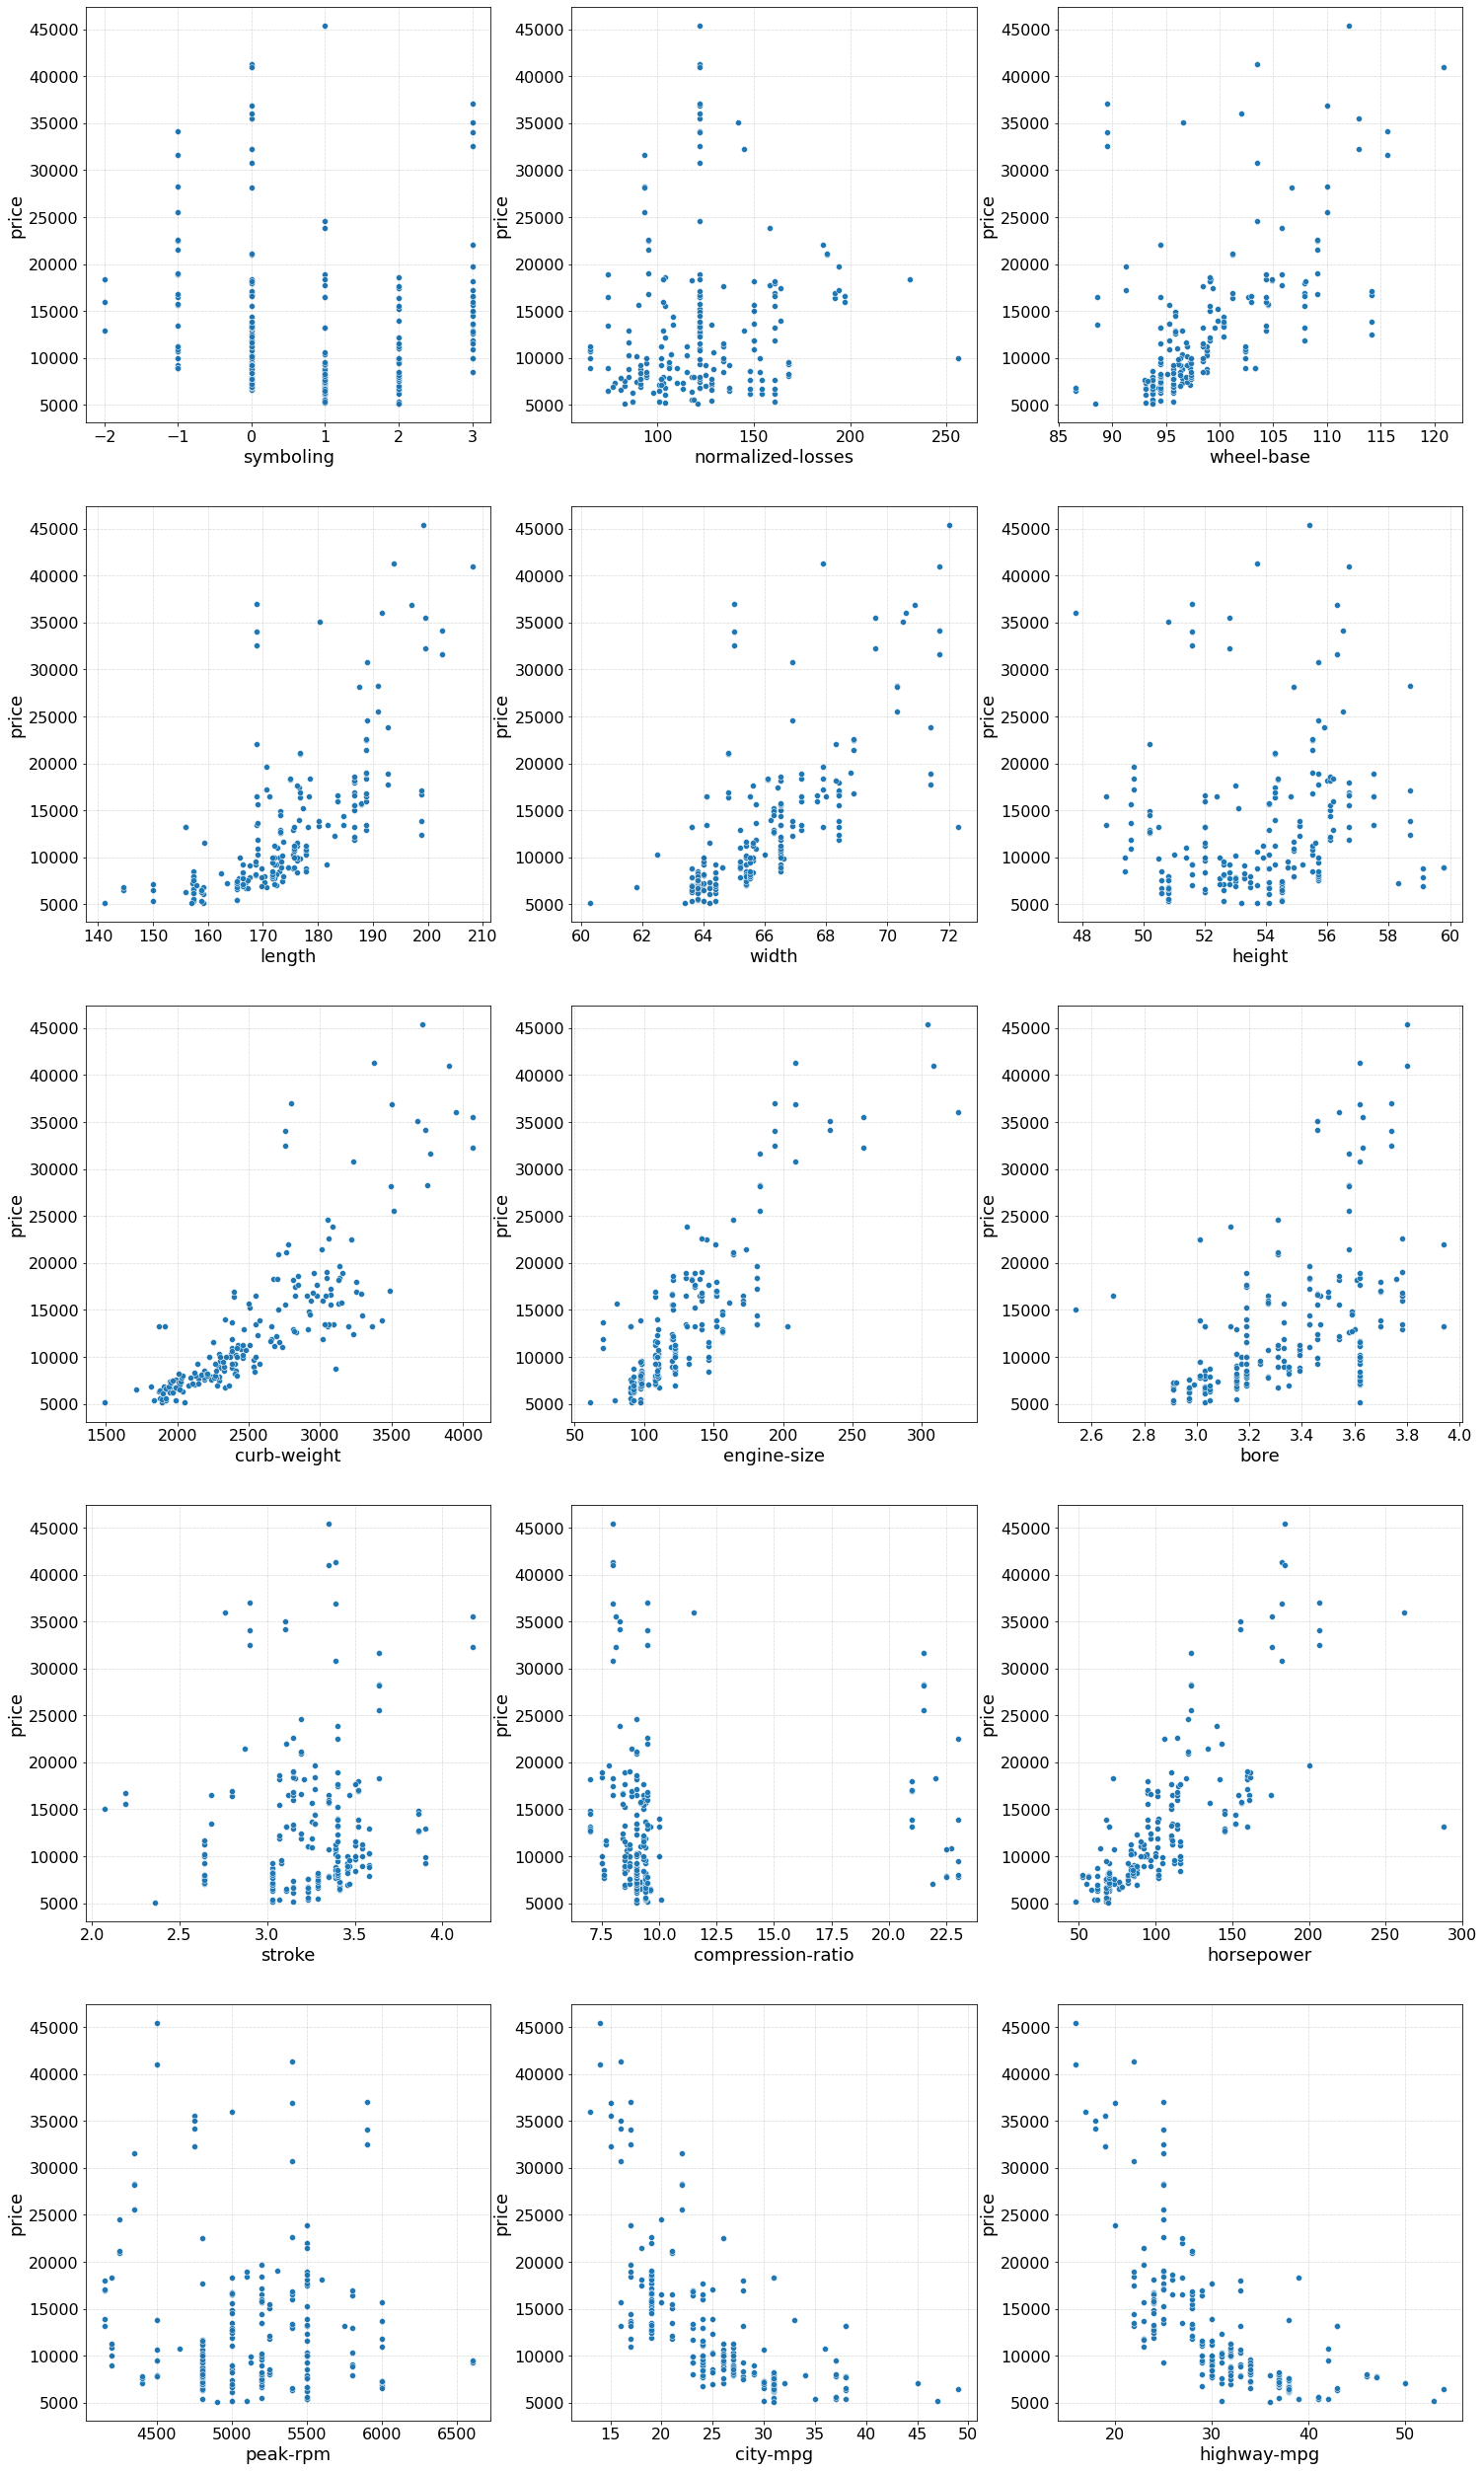

In [ ]:
# scatter plot for all numerical attributes
plt.figure(figsize = (25,45))
for i in enumerate (num_features):
    plt.subplot(5,3,i[0]+1)
    sns.scatterplot(x = i[1],y = 'price',data = data)

**OBSERVATIONS**

1) There is a positive linear relationship between price and following attributes(wheel base, length, width, curb weight, engine size, bore, horsepower). From this we can say that, when overall size and engine of vehicle increase, it's price also increase.

2) There is a inverse relationship between price and following attributes( city mpg, highway mpg). As we can see in correlation matrix almost all attributes has negative relationship with these attributes. So we can say that, when overall size of vehicle increases it,s mpg decreases.

3) Compression ratio and height attributes has very less relation with other attributes.

4) Other attributes has no relation between "price".


## **Data Cleaning**

REMOVING OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


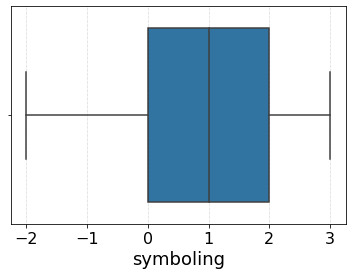

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


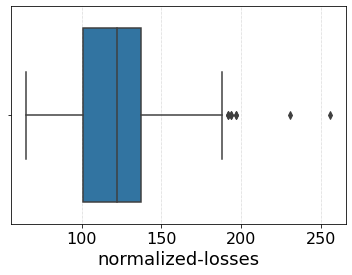

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


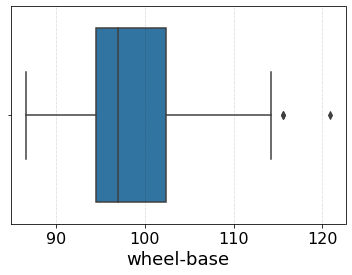

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


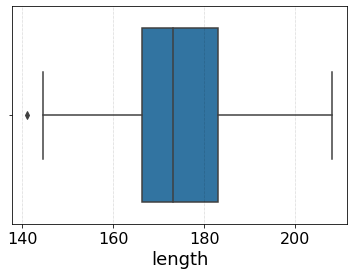

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


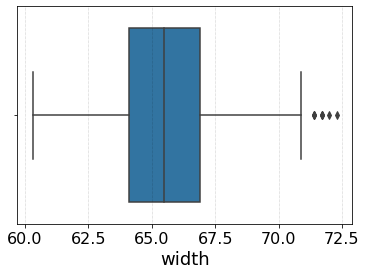

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


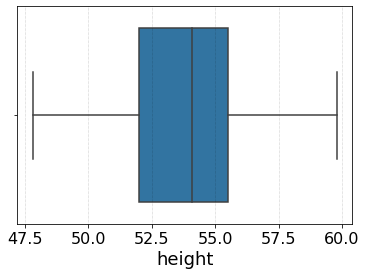

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


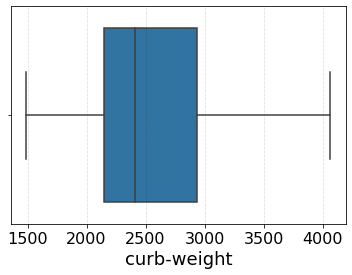

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


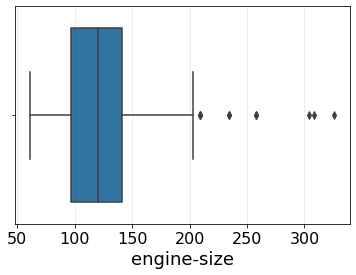

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


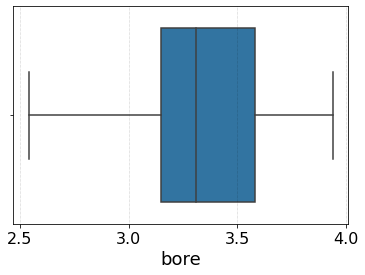

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


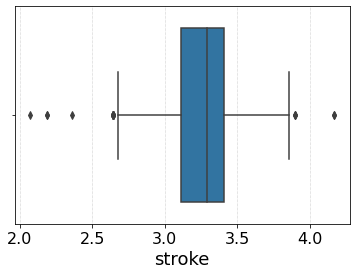

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


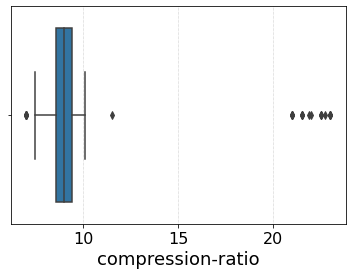

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


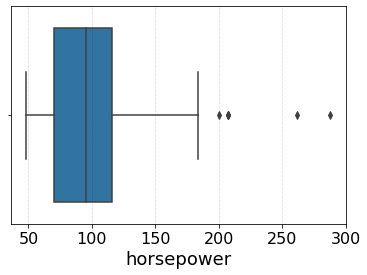

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


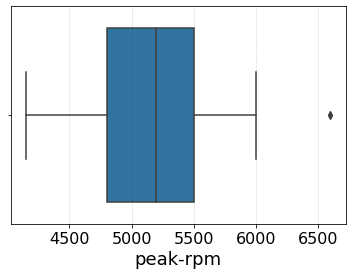

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


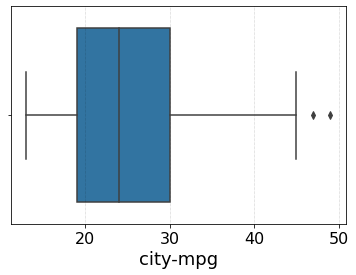

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


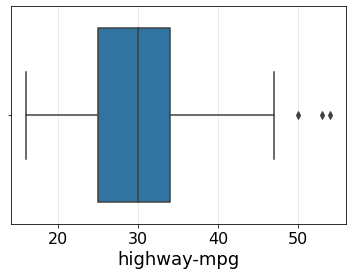

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


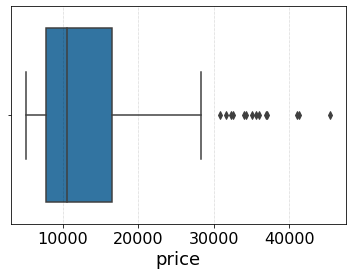

In [ ]:
for col in data._get_numeric_data():
    sns.boxplot(data[col])
    plt.show()

We can observe that there are outliers present in the data

In [ ]:
def thresholds(dataframe, cols, q1=0.25, q3=0.75):
    for col_name in cols:
        quartile1 = dataframe[col_name].quantile(q1)
        quartile3 = dataframe[col_name].quantile(q3)
        IQR = quartile3 - quartile1
        up_limit = quartile3 + 1.5 * IQR
        low_limit = quartile1 - 1.5 * IQR
        dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    return dataframe

In [ ]:
cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'engine-size', 'stroke','compression-ratio', 'horsepower', 'highway-mpg', 'price']
data=thresholds(data,cols )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


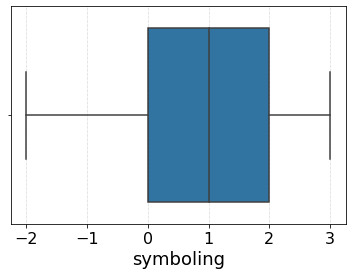

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


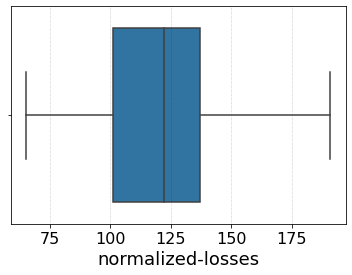

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


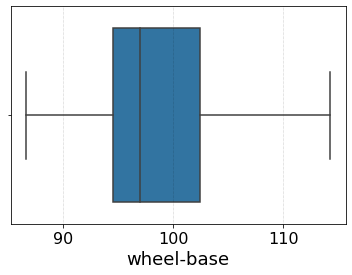

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


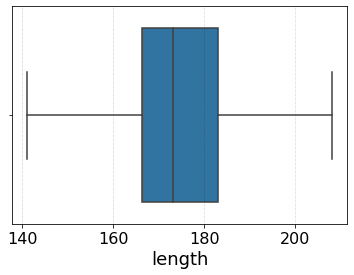

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


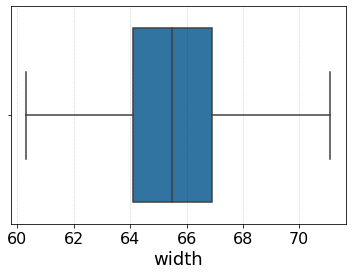

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


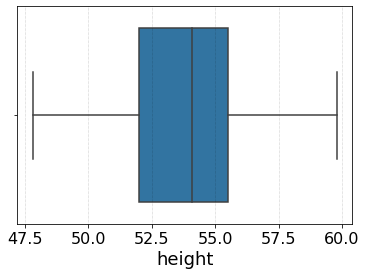

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


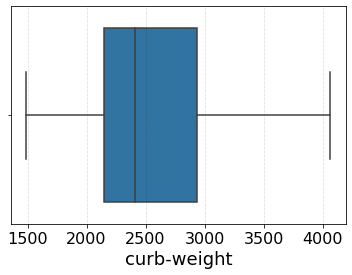

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


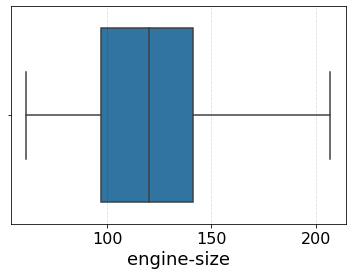

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


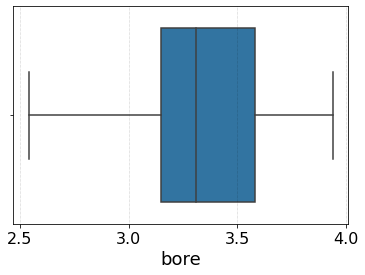

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


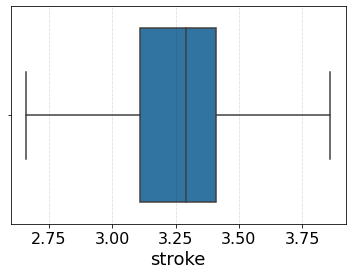

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


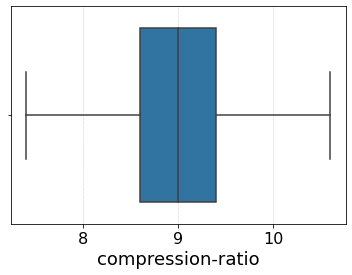

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


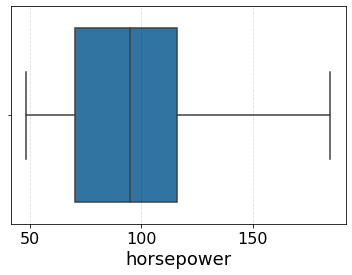

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


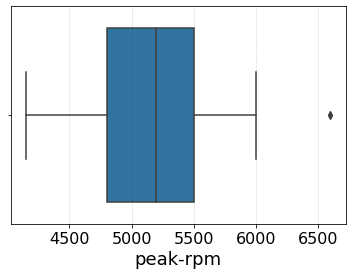

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


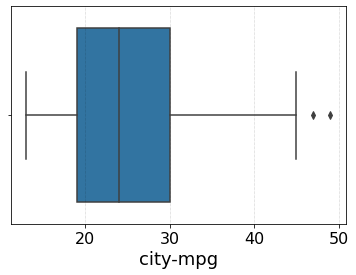

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


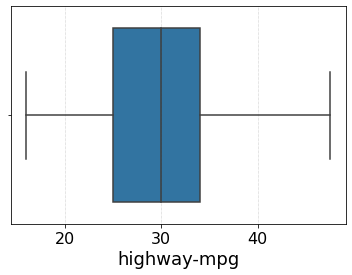

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


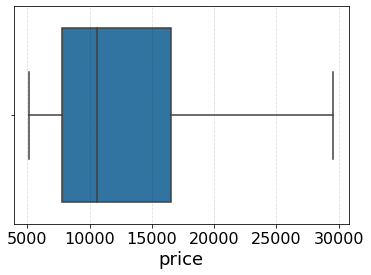

In [ ]:
for col in df._get_numeric_data():
    sns.boxplot(df[col])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


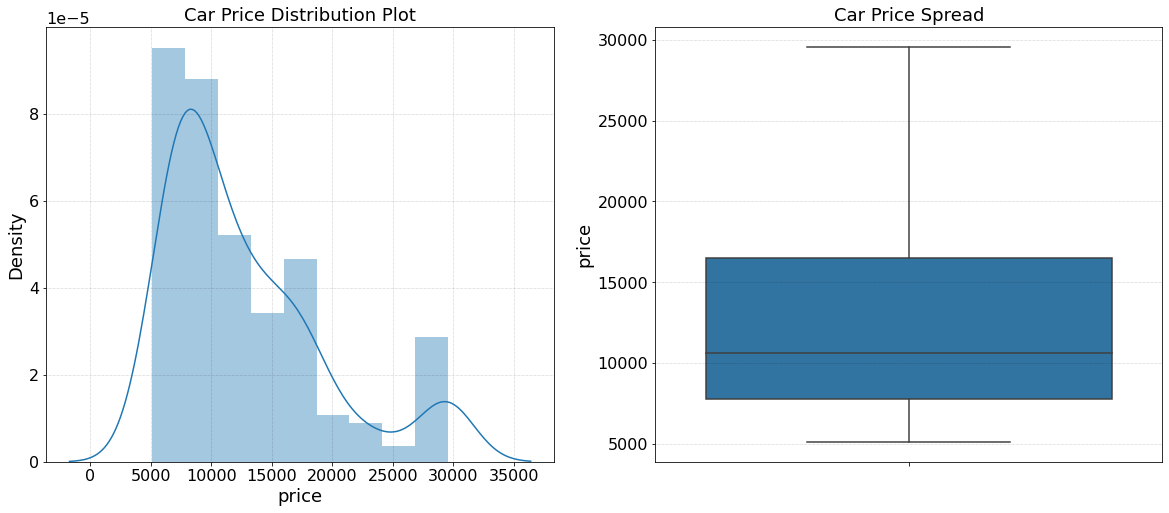

In [ ]:

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

In [ ]:
data.isnull().sum().sum()

0

# Encoding

In [ ]:
data=pd.get_dummies(data, drop_first=True)

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
def knn_imputer(df, n):
    imputer = KNNImputer(n_neighbors = n)
    df_filled = imputer.fit_transform(df)
    df_knn_imp = pd.DataFrame(df_filled,columns = df.columns)
    return df_knn_imp

In [ ]:
#Filling Null values with KNN imputer in normalized-loss column
data=knn_imputer(data, 4)

In [ ]:
data['normalized-losses'].isnull().sum()

0

In [ ]:

data.isnull().sum().sum()

0

# Building Model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
X=data.drop('price', axis=1)
Y=data[['price']]

In [ ]:
models=[LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor()]

In [ ]:
def reg_models(x, y, models):
    for model in models:
        X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.25, random_state=50)
        model.fit(X_train,Y_train)
        Y_test_pred=model.predict(X_test)
        print(model)
        print('Mean Squared Error: {}'.format(mean_squared_error(Y_test, Y_test_pred)))
        print('Regression Score(r2): {}'.format(r2_score(Y_test, Y_test_pred)))
        print('-----------------------------------------------------')

In [ ]:
result1=reg_models(X,Y,models)

LinearRegression()
Mean Squared Error: 3508658.235751396
Regression Score(r2): 0.9042017401268081
-----------------------------------------------------
Lasso()
Mean Squared Error: 3350350.119048496
Regression Score(r2): 0.9085240881826575
-----------------------------------------------------
Ridge()
Mean Squared Error: 3101522.5898632337
Regression Score(r2): 0.9153179229487811
-----------------------------------------------------
KNeighborsRegressor()
Mean Squared Error: 9577173.127050053
Regression Score(r2): 0.7385107187907092
-----------------------------------------------------
DecisionTreeRegressor()
Mean Squared Error: 7045243.75
Regression Score(r2): 0.8076409709115077
-----------------------------------------------------


# Hyperparameter Tuning

In [ ]:
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

In [ ]:
# def pipe(df1):
#   Input=[('scale',StandardScaler()), (models,df1)]

In [ ]:
# models=[Lasso(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor()]

In [ ]:
# model = Pipeline(StandardScaler(with_mean=False), LinearRegression())

In [ ]:
model_parameters={
    'Linear Regression':{
        'model': LinearRegression(),
        'params': {'fit_intercept': [True , False],
                   'normalize': [True, False],
                    }},
    'Lasso Regression': {
        'model': Lasso(),
        'params': {'selection': ['cyclic', 'random'],
                  'alpha': [0.1,0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1]}},
    'Ridge Regression' : {
        'model': Ridge(),
        'params': {'alpha': [0.1, 0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1],
                   'solver': ['auto', 'svd', 'cholesky']}},
    'KNeighborsRegeressor': {
        'model': KNeighborsRegressor(),
        'params': {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'weights': ['uniform', 'distance'],
                  'n_neighbors': [3, 4, 5]}},
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                   'splitter': ['best', 'random']}},
}


# model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
# 'Linear Regression':{
#         'model': LinearRegression(),
#         'params': {'fit_intercept': [True , False],
#                    'normalize': [True, False],
#                     }},

In [ ]:
def tuning(x, y, model_params):
    results=[]
    for model_name, mp in model_params.items():
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=50)
        clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
        clf.fit(X_train, Y_train)
        Y_test_pred=clf.predict(X_test)
        test_error=mean_squared_error(Y_test, Y_test_pred)
        r2score=r2_score(Y_test, Y_test_pred)
        print(model_name)
        print('Mean Squared Error: {}'.format(test_error))
        print('Regression Score(r2): {}'.format(r2score))
        print('------------------------------------------------------')
        results.append({'model': model_name,
                        'MSE': test_error,
                        'R2 Score': r2score,
                        'best_score': clf.best_score_,
                        'best_params': clf.best_params_})
    return results
# results=[]
# for model_name, mp in model_params.items():
# def tuning(x, y, model_params):
#     results=[]
#     for model_name, mp in model_params.items():
#         X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=50)
#         clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
#         clf.fit(X_train, Y_train)
#         pipe = Pipeline([ ('scaler', StandardScaler()), ('selector', VarianceThreshold()), ('classifier', LinearRegression()) ])
#         pipe.fit(X_train, y_train)
#         print('Training set score: ' + str(pipe.score(X_train,y_train)))
#         print('Test set score: ' + str(pipe.score(X_test,y_test)))
#         return results
# pipe = Pipeline([ ('scaler', StandardScaler()), ('selector', VarianceThreshold()), ('classifier', models) ])

In [ ]:
result = tuning(X, Y, model_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

Linear Regression
Mean Squared Error: 3508658.235751396
Regression Score(r2): 0.9042017401268081
------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.060e+07, tolerance: 4.997e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.019e+07, tolerance: 5.882e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Lasso Regression
Mean Squared Error: 3348209.742587047
Regression Score(r2): 0.9085825277132995
------------------------------------------------------
Ridge Regression
Mean Squared Error: 3101522.5898632337
Regression Score(r2): 0.9153179229487811
------------------------------------------------------
KNeighborsRegeressor
Mean Squared Error: 7394576.066560962
Regression Score(r2): 0.7981030148623787
------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

DecisionTreeRegressor
Mean Squared Error: 6216749.346153846
Regression Score(r2): 0.8302616757138214
------------------------------------------------------


In [ ]:
results

[{'model': 'Linear Regression',
  'MSE': 3508658.235751396,
  'R2 Score': 0.9042017401268081,
  'best_score': 0.7366209055466518,
  'best_params': {'fit_intercept': True, 'normalize': False}},
 {'model': 'Lasso Regression',
  'MSE': 3359989.6318015223,
  'R2 Score': 0.9082608968184044,
  'best_score': 0.7883336835967749,
  'best_params': {'alpha': 0.9, 'selection': 'random'}},
 {'model': 'Ridge Regression',
  'MSE': 3101522.5898632337,
  'R2 Score': 0.9153179229487811,
  'best_score': 0.8062304241637189,
  'best_params': {'alpha': 1, 'solver': 'auto'}},
 {'model': 'KNeighborsRegeressor',
  'MSE': 7394576.066560962,
  'R2 Score': 0.7981030148623787,
  'best_score': 0.7983947299349843,
  'best_params': {'algorithm': 'auto',
   'n_neighbors': 4,
   'weights': 'distance'}},
 {'model': 'DecisionTreeRegressor',
  'MSE': 6789242.634615385,
  'R2 Score': 0.8146306688905103,
  'best_score': 0.8019030769456664,
  'best_params': {'criterion': 'friedman_mse', 'splitter': 'random'}}]

In [ ]:
res = pd.DataFrame(result)

In [ ]:
res_sorted=res.sort_values('R2 Score', ascending = False)
res_sorted

,model,MSE,R2 Score,best_score,best_params
2,Ridge Regression,3.101523e+06,0.915318,0.806230,"{'alpha': 1, 'solver': 'auto'}"
1,Lasso Regression,3.348210e+06,0.908583,0.771269,"{'alpha': 1, 'selection': 'random'}"
0,Linear Regression,3.508658e+06,0.904202,0.736621,"{'fit_intercept': True, 'normalize': False}"
4,DecisionTreeRegressor,6.216749e+06,0.830262,0.809152,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,KNeighborsRegeressor,7.394576e+06,0.798103,0.798395,"{'algorithm': 'auto', 'n_neighbors': 4, 'weigh..."


In [ ]:
res_sorted.to_csv('result.csv',index=False)

# Final Model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
model=DecisionTreeRegressor()
model.fit(X_train, Y_train)
Y_test_pred=model.predict(X_test)
test_error=mean_squared_error(Y_test, Y_test_pred)
r2score=r2_score(Y_test, Y_test_pred)
print("Decision Tree")
print('Mean Squared Error: {}'.format(test_error))
print('Regression Score(r2): {}'.format(r2score))

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
# model=KNeighborsRegressor()
# model.fit(X_train, Y_train)
# Y_test_pred=model.predict(X_test)
# test_error=mean_squared_error(Y_test, Y_test_pred)
# r2score=r2_score(Y_test, Y_test_pred)
# print('Mean Squared Error: {}'.format(test_error))
# print('Regression Score(r2): {}'.format(r2score))

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
# model=LinearRegression()
# model.fit(X_train, Y_train)
# Y_test_pred=model.predict(X_test)
# test_error=mean_squared_error(Y_test, Y_test_pred)
# r2score=r2_score(Y_test, Y_test_pred)
# print('Mean Squared Error: {}'.format(test_error))
# print('Regression Score(r2): {}'.format(r2score))

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
# model=Lasso()
# model.fit(X_train, Y_train)
# Y_test_pred=model.predict(X_test)
# test_error=mean_squared_error(Y_test, Y_test_pred)
# r2score=r2_score(Y_test, Y_test_pred)
# print('Mean Squared Error: {}'.format(test_error))
# print('Regression Score(r2): {}'.format(r2score))

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
# model=Ridge()
# model.fit(X_train, Y_train)
# Y_test_pred=model.predict(X_test)
# test_error=mean_squared_error(Y_test, Y_test_pred)
# r2score=r2_score(Y_test, Y_test_pred)
# print('Mean Squared Error: {}'.format(test_error))
# print('Regression Score(r2): {}'.format(r2score))

Decision Tree
Mean Squared Error: 6988469.961538462
Regression Score(r2): 0.8091910877298416


As the result the best fit model is Decision Tree Regressor with an r2 score of 80%